In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd "/content/drive/MyDrive/GAT_USBNAR/CLB"

/content/drive/MyDrive/GAT_USBNAR/CLB


In [ ]:
ls

annotated_user_da_with_span_full.json            data.json.zip
clb-analysis/                                    glove.6B.300d.txt
CLB_GAT_5_emb_int_n_strategy.csv                 mapping.pair
CLB_GAT_5_emb_int_n_strategy_with_sentiment.csv  testListFile.json
clb-processed/                                   turn_lengths.txt
CraigListBergain.csv                             valListFile.json
data.json


In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot 
import plotly.express as px

In [ ]:
df = pd.read_csv("CLB_GAT_5_emb_int_n_strategy_with_sentiment.csv")
df.head(5)

,User,Agent,Slot-Value,Value,Negotiation Strategy User,Negotiation Strategy Agent,Agent Dialogue Act,Intent,GAT_n_strategy_agent,User_sentiment
0,1,1,1,1,1,1,1,1,[''],NaN
1,hi not sure if the charger would work for my c...,it will work i have never seen a car without a...,NaN,NaN,"['buyer_pos_sentiment', 'first_person_singular...","['first_person_singular_count_seller', 'third_...",unknown,init-price,"['first_person_singular_count_seller', '-3672'...",neu
2,still can i buy it for 5 ? i m on a tight budge,i think the lowest i would want to go is 8 .,NaN,NaN,"['first_person_singular_count_buyer', 'third_p...","['first_person_singular_count_seller', 'number...",counter-price,insist,"['first_person_singular_count_seller', '-3672'...",neu
3,how about 6 and i pick it up myself ? it ll sa...,7 and we have a deal .,NaN,NaN,"['buyer_pos_sentiment', 'first_person_singular...","['first_person_plural_count_seller', 'number_o...",counter-price,counter-price,"['first_person_plural_count_seller', '-3675', ...",neu
4,eh fine . 7 .,NaN,NaN,NaN,"['buyer_pos_sentiment', 'buyer_propose']",[''],NaN,agree,"['', '']",pos


In [ ]:
df[['User', 'Agent']] = df[['User', 'Agent']].fillna('')
df.head(5)

,User,Agent,Slot-Value,Value,Negotiation Strategy User,Negotiation Strategy Agent,Agent Dialogue Act,Intent,GAT_n_strategy_agent,User_sentiment
0,1,1,1,1,1,1,1,1,[''],NaN
1,hi not sure if the charger would work for my c...,it will work i have never seen a car without a...,NaN,NaN,"['buyer_pos_sentiment', 'first_person_singular...","['first_person_singular_count_seller', 'third_...",unknown,init-price,"['first_person_singular_count_seller', '-3672'...",neu
2,still can i buy it for 5 ? i m on a tight budge,i think the lowest i would want to go is 8 .,NaN,NaN,"['first_person_singular_count_buyer', 'third_p...","['first_person_singular_count_seller', 'number...",counter-price,insist,"['first_person_singular_count_seller', '-3672'...",neu
3,how about 6 and i pick it up myself ? it ll sa...,7 and we have a deal .,NaN,NaN,"['buyer_pos_sentiment', 'first_person_singular...","['first_person_plural_count_seller', 'number_o...",counter-price,counter-price,"['first_person_plural_count_seller', '-3675', ...",neu
4,eh fine . 7 .,,NaN,NaN,"['buyer_pos_sentiment', 'buyer_propose']",[''],NaN,agree,"['', '']",pos


In [ ]:
sum(df['User'].isna())

0

In [ ]:
intent = list(set(list(df['Intent'])))
intent = intent[1:]
intent = [i for i in intent if not str(i).isdigit()]
intent

['init-pricecounter-price',
 'agreecounter-price',
 'inquiryinquirycounter-price',
 'insistunknown',
 'unknownunknown',
 'unknowndisagree',
 'init-priceinsist',
 'unknowncounter-price',
 'inform',
 'inquiry',
 'informunknown',
 'inquiryinquiry',
 'agree',
 'vague-price',
 'agreeinquiry',
 'counter-pricecounter-priceinsist',
 'unknowninit-price',
 'insist',
 'agreeagree',
 'counter-priceagree',
 'informunknowndisagree',
 'inquiryunknowndisagree',
 'counter-priceinquiry',
 'unknowninsist',
 'intro',
 'unknownvague-price',
 'unknowncounter-priceinsist',
 'introagree',
 'vague-priceinit-price',
 'disagree',
 'init-price',
 'unknownvague-priceunknown',
 'unknownunknownunknown',
 'introcounter-price',
 'init-priceinquiryinsist',
 nan,
 'counter-pricecounter-price',
 'init-priceinit-price',
 'inquiryunknown',
 'inquiryinquiryinit-price',
 'counter-priceunknown',
 'introinit-price',
 'unknowninquiryinit-priceinsist',
 'unknown',
 'inquiryinit-price',
 'introunknown',
 'counter-price',
 'inquir

In [ ]:
dialog_act = list(set(list(df['Agent Dialogue Act'])))
dialog_act = dialog_act[1:]
dialog_act = [i for i in dialog_act if not str(i).isdigit()]
dialog_act

['unknownagree',
 'init-pricecounter-price',
 'unknownunknowncounter-price',
 'init-priceagree',
 'insistunknown',
 'informinforminsist',
 'unknownunknown',
 'unknowndisagree',
 'disagreedisagree',
 'unknowncounter-price',
 'inform',
 'disagreeinsist',
 'inquiry',
 'unknowndisagreedisagree',
 'inquiryagree',
 'informunknown',
 'inquiryinquiry',
 'agree',
 'vague-price',
 'agreeinquiry',
 'informdisagree',
 'counter-pricecounter-priceinsist',
 'informinit-price',
 'unknowninit-price',
 'insist',
 'counter-pricevague-price',
 'counter-priceagree',
 'inquirycounter-priceunknownunknown',
 'unknownagreeunknown',
 'counter-priceinquiry',
 'unknowninsist',
 'intro',
 'unknowndisagreeunknown',
 'unknownunknownagree',
 'unknownvague-price',
 'introagree',
 'disagree',
 'init-price',
 'introcounter-price',
 nan,
 'counter-pricecounter-price',
 'informinform',
 'counter-pricecounter-pricecounter-pricecounter-price',
 'inquiryunknown',
 'disagreecounter-price',
 'disagreeunknown',
 'disagreeinform

In [ ]:
['init-pricecounter-price','unknownunknownvague-priceinsist','disagree','disagreecounter-price','inquiryinquiry','unknownunknownagree','unknowndisagreedisagree',
 'init-priceagree','unknowndisagreeunknown','agree','counter-priceinquiry','unknowninit-price','informinit-price','disagreeinformunknown','introinit-price',
 'inquiryunknown','vague-price','counter-pricedisagree','unknownagree','insist','informinquiry','counter-priceunknown','unknowninsist','counter-pricecounter-pricecounter-pricecounter-price',
 'introinquiry','informinform','counter-priceinsist','introcounter-price','informunknown','init-price','disagreedisagree','inform','agreeunknown','unknowndisagree',
 'inquiryagree','insistunknown','introdisagree','inquiryvague-price','intro','unknownunknowncounter-price','insistunknowncounter-price','counter-pricecounter-price',
 'init-priceunknown','counter-pricevague-price','disagreeagree','informagree','unknownunknown','unknownagreeunknown','introunknown','unknowninforminform',
 'inquiry','counter-pricecounter-priceinsist','disagreeinform','introagree','agreeinquiry','unknowninquiry','disagreeinsist','counter-priceagree','disagreeunknown',
 'informdisagree','unknown','inquirycounter-priceunknownunknown','informinforminform','init-priceinquiry','unknowncounter-price','informinforminsist',
 'counter-price','unknownvague-price','informinsist']

['init-pricecounter-price',
 'unknownunknownvague-priceinsist',
 'disagree',
 'disagreecounter-price',
 'inquiryinquiry',
 'unknownunknownagree',
 'unknowndisagreedisagree',
 'init-priceagree',
 'unknowndisagreeunknown',
 'agree',
 'counter-priceinquiry',
 'unknowninit-price',
 'informinit-price',
 'disagreeinformunknown',
 'introinit-price',
 'inquiryunknown',
 'vague-price',
 'counter-pricedisagree',
 'unknownagree',
 'insist',
 'informinquiry',
 'counter-priceunknown',
 'unknowninsist',
 'counter-pricecounter-pricecounter-pricecounter-price',
 'introinquiry',
 'informinform',
 'counter-priceinsist',
 'introcounter-price',
 'informunknown',
 'init-price',
 'disagreedisagree',
 'inform',
 'agreeunknown',
 'unknowndisagree',
 'inquiryagree',
 'insistunknown',
 'introdisagree',
 'inquiryvague-price',
 'intro',
 'unknownunknowncounter-price',
 'insistunknowncounter-price',
 'counter-pricecounter-price',
 'init-priceunknown',
 'counter-pricevague-price',
 'disagreeagree',
 'informagree',


In [ ]:
domain = ['common']

In [ ]:
def make_metadata(df):
    #should return a json (orient = "records")
    l = len(df)
    d_frame = pd.DataFrame(columns = domain , index = [0])
    d_frame = {x:"" for x in domain}

    # d = str(df["Task Info"]).split(",")     # fetching the domain info of that row
    # d = [s.strip() for s in d]
    d = ['common']

    # S = str(df['Slot-Value']).split("-")[0] # fetching the slot info of that row
    # s1 = S.split(",")
    # s1 = [s.strip() for s in s1]
    
    
    s = str(df['Slot-Value']).split(",")
    s1 = []
    for j in range(len(s)):
        s1 = s1 + [s[j].split("=")[0]]
    s1 = [s.strip() for s in s1]

    #print("domain :" ,d)
    #print("slot:" ,s1)

    for i in domain :
        #dic = {x:"" for x in dom_slot[i]}
        dic = {x:"" for x in slot}
        if i in d :
            value = str(df["Value"]).split(",")
            k = 0
            #print("Value :",value)
            for j in s1 :
                if j in slot and (str(value[k]) != "UNK" and str(value[k]) != "unk" and str(value[k]) != "nan"):       
                    dic[j] = value[k]
                    k += 1

        d_frame[i] = {"book":dict(),"semi":dic}

       
    #return d_frame.to_json().replace('\\', '')
    return d_frame
    


In [ ]:
def make_dialog_act_user(df):
    # dom = str(df["Task Info"]).split(",")     # fetching the domain info of that row
    # dom = [s.strip() for s in dom]

    dom = domain

    if str(df["Value"]) != 'nan':
        for i in range(1):
            s = str(df['Slot-Value']).split(",") # Fetching the slot info
            s1 = []
            for j in range(len(s)):
                s1 = s1 + [s[j].split("=")[0]]
            s1 = [s.strip() for s in s1]

        v = str(df["Value"]).split(",") # fetching value info
        v = [str(vv).strip() for vv in v]

        for dd in dom:
            d = {dd+"-"+str(df['Intent']) : []}

            for j in range(len(s1)):
                if str(v[j]) != "UNK" and str(v[j]) != "unk" and str(v[j]) != "nan" and str(s1[j]) != "nan":
                    l = []
                    l.append(str(s1[j]))
                    l.append(str(v[j]))

                    d[list(d.keys())[i]].append(l)
    else:
        for dd in dom:
              d = {dd+"-"+str(df['Intent']) : []}
              d[list(d.keys())[0]].append(["None","None"])                
    return d
    #return {x:[] for x in str(df['INTENT']).split(',') if str(df['INTENT']) is not None}

def make_dialog_act_agent(df):
    # dom = str(df["Task Info"]).split(",")     # fetching the domain info of that row
    # dom = [s.strip() for s in dom]
    dom = domain
    dic = dict()
    for dd in dom:
        if str(df['Agent Dialogue Act']) != 'nan':
            flag = 0
            # print(df["Agent"])
            s = df["Agent"].lower()
            dic[dd+"-"+str(df['Agent Dialogue Act'])] = []
            if flag == 0:
                if len(re.findall("<price>_[|-]*[0-9]*.[0-9]*",s)) > 0 :
                    f = re.findall("<price>_[|-]*[0-9]*.[0-9]*",s)
                    ff = f[0][8:].strip()
                    dic[dd+"-"+str(df['Agent Dialogue Act'])].append(["Price_ratio",ff])
                    flag = 1
            else :
                dic[dd+"-"+str(df['Agent Dialogue Act'])] = ['none','none']    

            
    return dic
    
def make_span_info_user(df):
    L = []
    if str(df['Intent']) != 'nan':
        S = str(df["Intent"])

        s = str(df['Slot-Value']).split(",") # Fetching the slot info
        s1 = []
        for j in range(len(s)):
            s1 = s1 + [s[j].split("=")[0]]
        s1 = [s.strip() for s in s1]

        v = str(df["Value"]).split(",") # fetching the value info
        v = [str(vv).strip() for vv in v]
        for i in range(len(v)):
            v[i] = str(v[i]).replace("-","")

        # dom = str(df["Task Info"]).split(",")     # fetching the domain info of that row
        # dom = [s.strip() for s in dom]
        dom = domain

        for dd in dom:    
            i = 0
            # print(v)
            # print("domain:",dd)

            for ss in s1:
                if str(ss) != "nan" :
                    # print("ss:",ss)
                    l = []

                    u = str(df['User'])
                    u = u.replace(v[i],"[place_holder]")
                    u = u.replace(str(v[i]).lower(),"[place_holder]")
                    u = u.split(" ")
                    # print(u)
                    if "" in u:
                        u.remove("")
                    if " " in u:    
                        u.remove(" ")
                    
                    for k in range(len(u)):
                        u[k] = u[k].replace(".","")
                        u[k] = u[k].replace(",","")
                    # print(u)
                    # print(v[i])

                    s = [j for j in range(len(u)) if str(u[j]).find('[place_holder]')!=-1]
                    
                    if len(s)>0 and (str(v[i]) != "UNK" and str(v[i]) != "unk" and str(v[i]) != "nan"):
                        l.append(dd+"-"+S)
                        l.append(str(ss))
                        l.append(v[i])
                        l.append(s[0])
                        l.append(s[0])
                    

                    i += 1

                    if len(l)>0:
                        L.append(l)
    return L    
    #return [[x] for x in str(df['INTENT']).split(',') if str(df['INTENT']) is not None] 


def make_span_info_agent(df):
    # dom = str(df["Task Info"]).split(",")     # fetching the domain info of that row
    # dom = [s.strip() for s in dom]
    dom = domain

    L = []
    action = df["Agent Dialogue Act"]

    if str(action)!="nan":
        for dd in dom :
            s = df["Agent"].lower()
            # print("domain:",dd)
            # print("action:",action)
            if len(re.findall("<price>_[|-]*[0-9]*.[0-9]*",s)) > 0 :
                l = []
                f = re.findall("<price>_[|-]*[0-9]*.[0-9]*",s)
                ff = ff = f[0][8:].strip()
                lim = s.find(ff)
                ss = s[:lim]
                
                l.append(dd+"-"+action)
                l.append("Price_ratio")
                l.append(ff)
                l.append(len(ss.split(" "))-1)
                l.append(len(ss.split(" "))-1)

                L.append(l)            

    #return [[x] for x in str(df['Agent Dialouge Act']).split(',') if str(df['Agent Dialouge Act']) is not None]   
    return L        

In [ ]:
def make_log(df):
    # should return a json (orient = "records")
    l = len(df)
    # text = []
    # metadata = []

    ll = []

    for i in range(2*l):
        k = i//2
        
        if i%2 == 0 : # user's turn
            dframe = {"text":"","metadata":""}
            if str(df.iloc[k,3]) != "nan" :
                dframe["text"] = df.iloc[k,0] #+ " " +  "<eos_u>" + " " + "<sos_s>" + " " + df.iloc[k,3] + " " + "<eos_s>"
            else :  
                dframe["text"] = df.iloc[k,0] 
            # dframe["sentiment"] = df.iloc[k,3]
            

            dframe["metadata"] = dict()
            dframe['dialog_act'] = make_dialog_act_user(df.iloc[k]) # for annotated_user_da_with_span.json file
            dframe['span_info'] = make_span_info_user(df.iloc[k])     # for annotated_user_da_with_span.json file

            #################### IF WANT TO ADD NEGOTIATION STRATEGY INFO INTO THE CONTEXT THEN ACTIVATE THE BELOW LINE ####################
            dframe["n_strategy"] = df.iloc[k,4]

        else : # agent's turn
            dframe = {"text":"","metadata":""}
            dframe["text"] = df.iloc[k,1] #"<sos_ps>" + " " + df.iloc[k,2] + " " + "<eos_ps>" + " " + "<sos_r>" + " " + df.iloc[k,1]

            #################### IF WANT TO ADD NEGOTIATION STRATEGY INFO INTO THE CONTEXT THEN ACTIVATE THE BELOW LINE ####################
            dframe["n_strategy"] = df.iloc[k,8]
            #################### IF WANT TO ADD SENTIMENT INFO INTO THE CONTEXT THEN ACTIVATE THE BELOW LINE ####################
            dframe["sentiment"] = df.iloc[k,9]

            dframe["metadata"] = make_metadata(df.iloc[k])
            dframe['dialog_act'] = make_dialog_act_agent(df.iloc[k])# for annotated_user_da_with_span.json file
            dframe['span_info'] = make_span_info_agent(df.iloc[k])    # for annotated_user_da_with_span.json file

        ll.append(dframe)      
        
    #dframe = pd.DataFrame(columns=["metadata","text"])
    
    
    #return dframe.to_json(orient = "records").replace("\\","")
    return ll


In [ ]:
def make_goal(df):
    df.index = [i for i in range(len(df))]
    # should return a json (orient = "records")
    l = len(df)
    # print(df["Task Info"][0])
    dic = {x:dict() for x in domain}
    
    all_dom = []
    for i in range(l):
        # d = str(df["Task Info"][i]).split(",")     # fetching the domain info of that row
        # d = [s.strip() for s in d]
        d = domain
        all_dom = all_dom + d
    all_dom = list(set(all_dom))
    if 'nan' in all_dom:
        all_dom.remove('nan')
    
    for i in all_dom:
        dict1 = {x:"" for x in slot}
        dic[i] = {"info": dict1}

    for i in range(l):
        # d = str(df["Task Info"][i]).split(",")     # fetching the domain info of that row
        # d = [s.strip() for s in d]
        d = domain
        #d.remove("nan")
        #print(d)

        s = str(df['Slot-Value'][i]).split(",")
        s1 = []
        for j in range(len(s)):
            s1 = s1 + [s[j].split("=")[0]]
        s1 = [s.strip() for s in s1]
        #print(s1)
        value = str(df["Value"][i]).split(",")
        #print(value)
        # print("len s1:",s1)
        # print("len value:",value)
        # domain_dict = {y:"" for y in slot}
        for dd in d:
            for j in range(len(s1)):
                # print(j)
                if dd in all_dom and str(value[j])!="UNK" and str(value[j]) != "unk" and str(value[j]) != "nan" and str(s1[j]) != "nan":
                    # print("value:",value[j])
                    # print("slot:",s1[j])
                    dic[dd]["info"][s1[j]] = value[j]
                    #domain_dict[s1[j]] = value[j]

            #dic[dd] = {"info":domain_dict }   


    return dic

In [ ]:
def maindata(df):
    #main_df = pd.DataFrame(index = [0])
    turn_len = []
    main_df = dict()
    #main_df.index = ["goal","log"]
    i = 1
    lc = 0
    ll = 0
    while lc < len(df):
        #print("hello")
        flag = 0
        ul = len(df)
        if str(df.iloc[lc,0]) == str(i) or str(df.iloc[lc,0]).isdigit():
            #print("hello")
            i += 1
            ll = lc + 1
            
            k = ll
            while k < len(df) and flag == 0:
                if str(df.iloc[k,0]) == str(i) or str(df.iloc[k,0]).isdigit():
                    ul = k
                    lc = ul-1
                    flag = 1
        
                k += 1 

            print("lower limit : ",ll)
            print("upper limit : ",ul) 

            turn_len.append((ul-ll)-1)

            goal = make_goal(df[ll:ul])
            log = make_log(df[ll:ul])
            main_df[str(i-1)+".json"] = {"goal":goal,"log":log}
              
        lc += 1 
    return main_df,turn_len


In [ ]:
l = len(df)
f_slot_list = []
for i in range(l):
    s = str(df["Slot-Value"][i]).split(",")
    s = [s[j].split("=") for j in range(len(s))]
    s1 = []
    for j in range(len(s)):
        s1 = s1+s[j]
    for j in range(len(s1)):
        f_slot_list.append(s1[::2][0])

f_slot_list = list(set(f_slot_list))
f_slot_list = [f_slot_list[i].strip() for i in range(len(f_slot_list))]
slot = list(set(sorted(f_slot_list)))

slot.remove("")
slot.remove("nan")

slot = [i for i in slot if not str(i).isdigit()]


In [ ]:
slot

['Price_ratio']

In [ ]:
f,turn_len = maindata(df)

Streaming output truncated to the last 5000 lines.
lower limit :  18832
upper limit :  18836
lower limit :  18837
upper limit :  18840
lower limit :  18841
upper limit :  18842
lower limit :  18843
upper limit :  18848
lower limit :  18849
upper limit :  18853
lower limit :  18854
upper limit :  18857
lower limit :  18858
upper limit :  18865
lower limit :  18866
upper limit :  18871
lower limit :  18872
upper limit :  18877
lower limit :  18878
upper limit :  18881
lower limit :  18882
upper limit :  18886
lower limit :  18887
upper limit :  18892
lower limit :  18893
upper limit :  18895
lower limit :  18896
upper limit :  18899
lower limit :  18900
upper limit :  18905
lower limit :  18906
upper limit :  18911
lower limit :  18912
upper limit :  18916
lower limit :  18917
upper limit :  18920
lower limit :  18921
upper limit :  18925
lower limit :  18926
upper limit :  18932
lower limit :  18933
upper limit :  18938
lower limit :  18939
upper limit :  18942
lower limit :  18943
uppe

In [ ]:
json_object = json.dumps(f, indent = 4)
with open("data.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
json_object = json.dumps(f, indent = 4)
with open("annotated_user_da_with_span_full.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
with open("turn_lengths.txt", "w") as outfile:
    outfile.write(str(turn_len[:-1]))

### Turn-lengths visualization :::

In [ ]:
with open('turn_lengths.txt') as f:
    lines = f.readlines()

l = lines[0].split(", ")
l[0] = l[0].split("[")[1]
l[-1] = l[-1].split("]")[0]

d = pd.Series(l).value_counts()
ld = d.index
ld = [int(i) for i in ld]
data = pd.DataFrame({'indices': ld, 'value': list(d.values)})
data = data.sort_values(by='indices')
data

,indices,value
8,0,56
4,1,393
2,2,1026
0,3,1403
1,4,1239
3,5,731
5,6,320
6,7,136
7,8,57
9,9,21


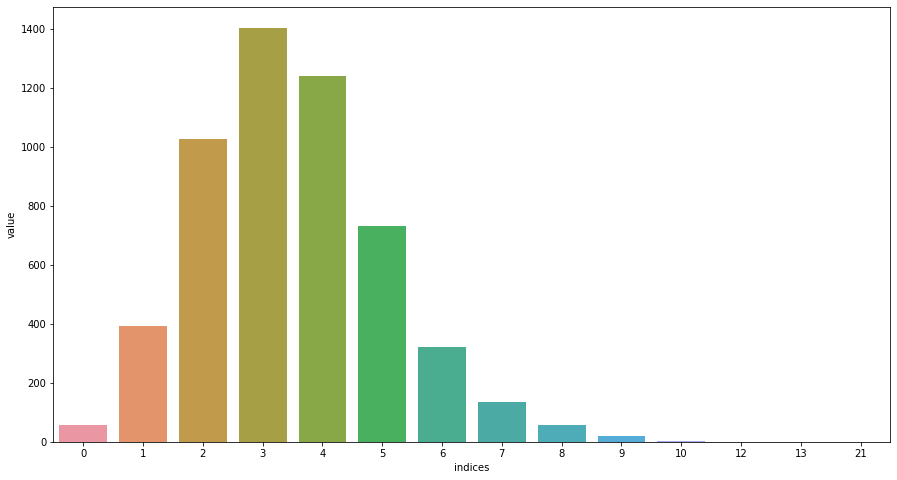

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
sns.barplot(ax=ax, x=data.indices, y=data.value)

## Creating valListFile.json and testListFile.json :::

In [ ]:
cd "../Nego_UBAR/data"

/content/drive/MyDrive/Nego_UBAR/data


In [ ]:
ls

annotated_user_da_with_span_full.json  data.zip           valListFile.json
CraigListBergain.csv                   glove.6B.300d.txt
data.json                              testListFile.json


In [ ]:
import zipfile
archive = zipfile.ZipFile('data.zip', 'r')
data = archive.open('data.json', 'r').read()
data = json.loads(data)

In [ ]:
(5956 - ((5956*75)//100))//2 + ((5956*75)//100)

5211

In [ ]:
f = open('valListFile.json','w')
f.close()

f1 = open('testListFile.json','w')
f1.close()

flag = 0

for fn, dial in data.items():
    if fn == '4467.json':
        flag = 1
    elif fn == '5211.json' :
        flag = 2

    if flag == 1 :
        f = open('valListFile.json','a')
        f.write(str(fn))
        f.write('\n') 
        f.close()
    elif flag == 2 :
        f1 = open('testListFile.json','a')
        f1.write(str(fn))
        f1.write('\n')
        f1.close()     
    print(fn)

Streaming output truncated to the last 5000 lines.
957.json
958.json
959.json
960.json
961.json
962.json
963.json
964.json
965.json
966.json
967.json
968.json
969.json
970.json
971.json
972.json
973.json
974.json
975.json
976.json
977.json
978.json
979.json
980.json
981.json
982.json
983.json
984.json
985.json
986.json
987.json
988.json
989.json
990.json
991.json
992.json
993.json
994.json
995.json
996.json
997.json
998.json
999.json
1000.json
1001.json
1002.json
1003.json
1004.json
1005.json
1006.json
1007.json
1008.json
1009.json
1010.json
1011.json
1012.json
1013.json
1014.json
1015.json
1016.json
1017.json
1018.json
1019.json
1020.json
1021.json
1022.json
1023.json
1024.json
1025.json
1026.json
1027.json
1028.json
1029.json
1030.json
1031.json
1032.json
1033.json
1034.json
1035.json
1036.json
1037.json
1038.json
1039.json
1040.json
1041.json
1042.json
1043.json
1044.json
1045.json
1046.json
1047.json
1048.json
1049.json
1050.json
1051.json
1052.json
1053.json
1054.json
1055.json
10